<a href="https://colab.research.google.com/github/zinia94/MachineLearning/blob/main/notebooks/machine-learning/supervised-learning/ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning
You should build a machine learning pipeline using an ensemble learning model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test an ensemble learning model, such as [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) or [gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [18]:
import pandas as pd
import sklearn.model_selection as skms
import sklearn.ensemble as sken
import sklearn.metrics as met

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/mnist.csv")

df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train, df_test = skms.train_test_split(df, train_size = 0.8, random_state = 42)

print("df size: ", df.shape)
print("df_train size: ", df_train.shape)
print("df_test size: ", df_test.shape)

df size:  (4000, 786)
df_train size:  (3200, 786)
df_test size:  (800, 786)


In [7]:
df_train.dtypes

id          int64
class       int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 786, dtype: object

<Axes: >

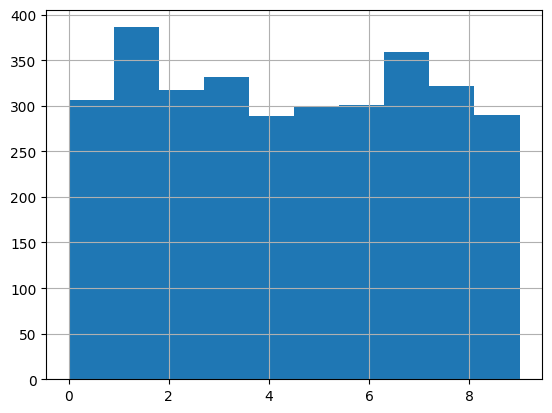

In [8]:
df_train['class'].hist()

In [9]:
x_train = df_train.drop(["id", "class"], axis= 1)
y_train = df_train["class"]
x_test = df_test.drop(["id", "class"], axis= 1)
y_test = df_test["class"]

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (3200, 784)
y_train size:  (3200,)
x_test size:  (800, 784)
y_test size:  (800,)


In [57]:
model = sken.RandomForestClassifier(criterion = "log_loss")
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
accuracy = met.accuracy_score(y_test, y_predicted)
accuracy

0.93

In [53]:
model2 = sken.HistGradientBoostingClassifier(max_depth = 10)

model2.fit(x_train, y_train)

y_predicted2 = model2.predict(x_test)

accuracy2 = met.accuracy_score(y_test, y_predicted2)

accuracy2


0.92625